In [34]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras import layers,models

In [35]:
BATCH_SIZE = 32
IMG_SIZE = 48
ALPHA = 0.35

dir = os.listdir();path = dir[dir.index("data")]

d_train = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset='training',
    seed=42,
    image_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE
)

d_val = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset='validation',
    seed=42,
    image_size=(IMG_SIZE,IMG_SIZE),
    batch_size=BATCH_SIZE
)

class_names = d_train.class_names

print(f"\nClasses:\n{class_names}")

d_train = d_train.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
d_val = d_val.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

Found 1633 files belonging to 2 classes.
Using 1307 files for training.
Found 1633 files belonging to 2 classes.
Using 326 files for validation.

Classes:
['fire', 'non_fire']


## Not simulating Esp CAM conditions

In [52]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(IMG_SIZE,IMG_SIZE,3),
    alpha = ALPHA,
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False

model = models.Sequential([
    layers.Rescaling(1./127.5,offset=-1,input_shape=(IMG_SIZE,IMG_SIZE,3)),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.2),
    layers.Dense(len(class_names),activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

history = model.fit(
    d_train,
    validation_data=d_val,
    epochs=7
)

print(f"train_acc: {history.history['accuracy']}\nval_acc: {history.history['val_accuracy']}")



C:\Users\vivil\AppData\Local\Temp\ipykernel_12576\2590193429.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_8 (Rescaling)         │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_0.35_224            │ (None, 2, 2, 1280)     │       410,208 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_8      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │         2,562 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 412,770 (1.57 MB)

 Trainable params: 2,562 (10.01 KB)

 Non-trainable params: 410,208 (1.56 MB)

Epoch 1/7
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.8439 - loss: 0.3632 - val_accuracy: 0.9294 - val_loss: 0.2149
Epoch 2/7
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9472 - loss: 0.1402 - val_accuracy: 0.9479 - val_loss: 0.1842
Epoch 3/7
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9587 - loss: 0.1164 - val_accuracy: 0.9479 - val_loss: 0.1684
Epoch 4/7
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9709 - loss: 0.0975 - val_accuracy: 0.9509 - val_loss: 0.1660
Epoch 5/7
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9732 - loss: 0.0778 - val_accuracy: 0.9479 - val_loss: 0.1593
Epoch 6/7
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9816 - loss: 0.0723 - val_accuracy: 0.9479 - val_loss: 0.1575
Epoch 7/7
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9816 - loss: 0.0633 - val_accuracy: 0.9509 - val_loss: 0.1500
train_acc: [0.8439173698425293, 0.9472073316574097, 0.9586840271949768, 0.9709258079528809, 0.9732211232185364, 0.9816

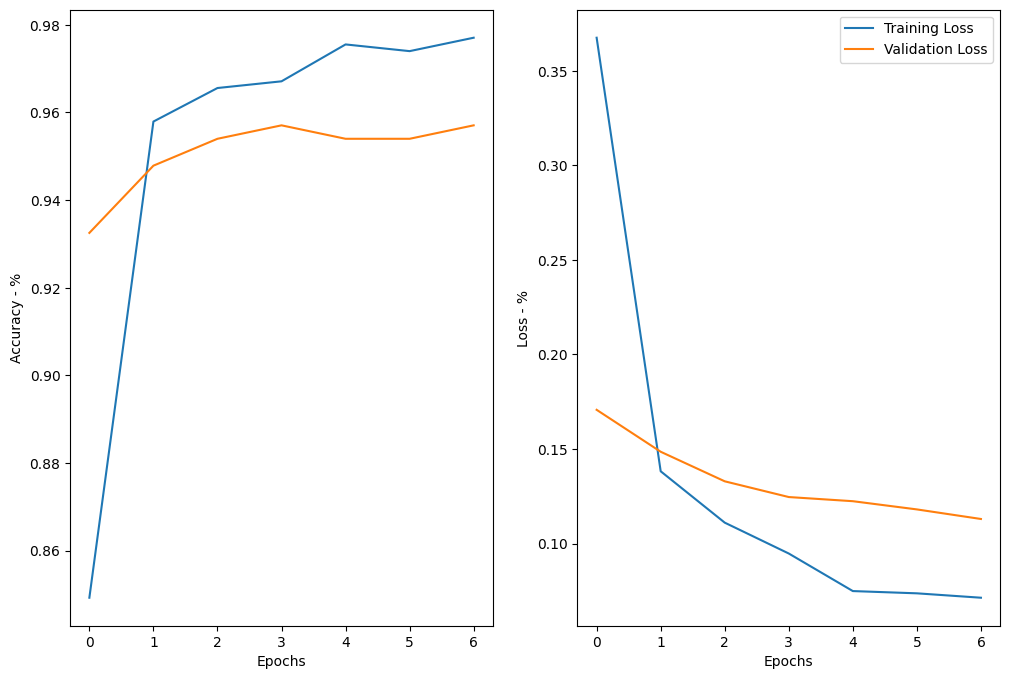

In [48]:
fig, axs = plt.subplots(1,2,figsize=(12,8),dpi=100)
axs[0].plot(history.history['accuracy'],label='Training Acc')
axs[0].plot(history.history['val_accuracy'],label='Validation Acc')
axs[0].set_ylabel("Accuracy - %")
axs[0].set_xlabel("Epochs")
axs[1].plot(history.history["loss"],label='Training Loss')
axs[1].plot(history.history["val_loss"],label='Validation Loss')
axs[1].set_ylabel("Loss - %")
axs[1].set_xlabel("Epochs")
plt.legend()
plt.show()

In [55]:
loss, accuracy = model.evaluate(d_val)

print(loss,accuracy)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9509 - loss: 0.1500
0.1499982625246048 0.9509202241897583


In [ ]:
import numpy as np

img_path = "non_fire_test.jpg"

img = tf.keras.utils.load_img(
    img_path, target_size=(48, 48)
)

img_array = tf.keras.utils.img_to_array(img)

img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)


score = predictions[0] 
chosen_class = np.argmax(score)
class_name = class_names[chosen_class]

print(f"Resultado: {class_name}")
print(f"Confiança: {100 * np.max(score):.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Resultado: non_fire
Confiança: 57.94%


## Simulating ESP conditions

In [49]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.2),
    layers.RandomBrightness(0.2)
])

augmented_train_data = d_train.map(lambda x,y: (data_augmentation(x,training=True),y),num_parallel_calls=tf.data.AUTOTUNE)

augmented_train_data = augmented_train_data.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_7 (Rescaling)         │ (None, 48, 48, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_0.35_224            │ (None, 2, 2, 1280)     │       410,208 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_7      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 2)              │         2,562 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 412,770 (1.57 MB)

 Trainable params: 2,562 (10.01 KB)

 Non-trainable params: 410,208 (1.56 MB)

Epoch 1/7
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.8416 - loss: 0.3669 - val_accuracy: 0.9018 - val_loss: 0.2227
Epoch 2/7
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9319 - loss: 0.1810 - val_accuracy: 0.9294 - val_loss: 0.1755
Epoch 3/7
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9457 - loss: 0.1408 - val_accuracy: 0.9356 - val_loss: 0.1608
Epoch 4/7
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9579 - loss: 0.1247 - val_accuracy: 0.9448 - val_loss: 0.1533
Epoch 5/7
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9617 - loss: 0.1124 - val_accuracy: 0.9448 - val_loss: 0.1604
Epoch 6/7
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9648 - loss: 0.0897 - val_accuracy: 0.9448 - val_loss: 0.1530
Epoch 7/7
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9770 - loss: 0.0799 - val_accuracy: 0.9479 - val_loss: 0.1511
train_acc: [0.8416220545768738, 0.9319051504135132, 0.9456771016120911, 0.9579188823699951, 0.9617444276809692, 0.9648

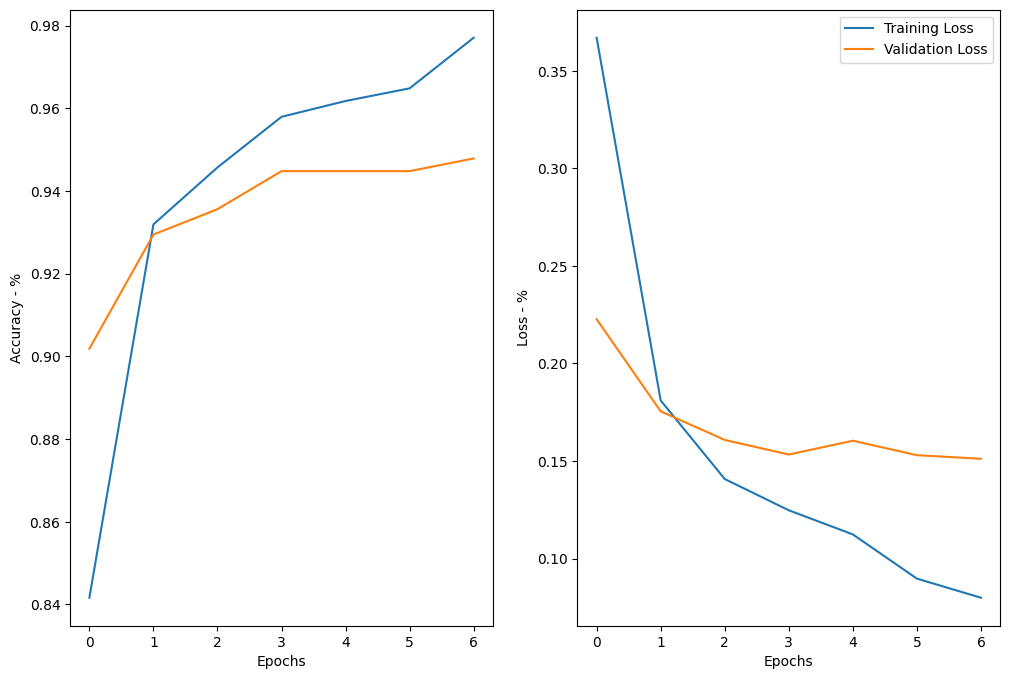

In [51]:
model_esp_conditions = models.Sequential([
    layers.Rescaling(1./127.5,offset=-1,input_shape=(IMG_SIZE,IMG_SIZE,3)),
    #layers.GaussianNoise(0.2),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.2),
    layers.Dense(len(class_names),activation='softmax')
])

model_esp_conditions.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model_esp_conditions.summary()

history_esp = model_esp_conditions.fit(
    augmented_train_data,
    validation_data=d_val,
    epochs=7
)

print(f"train_acc: {history_esp.history['accuracy']}\nval_acc: {history_esp.history['val_accuracy']}")
fig, axs = plt.subplots(1,2,figsize=(12,8),dpi=100)
axs[0].plot(history_esp.history['accuracy'],label='Training Acc')
axs[0].plot(history_esp.history['val_accuracy'],label='Validation Acc')
axs[0].set_ylabel("Accuracy - %")
axs[0].set_xlabel("Epochs")
axs[1].plot(history_esp.history["loss"],label='Training Loss')
axs[1].plot(history_esp.history["val_loss"],label='Validation Loss')
axs[1].set_ylabel("Loss - %")
axs[1].set_xlabel("Epochs")
plt.legend()
plt.show()

In [58]:
loss, accuracy = model_esp_conditions.evaluate(d_val)
print(loss,accuracy)


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9479 - loss: 0.1511
0.15114547312259674 0.9478527903556824
